In [10]:
import numpy as np
from lattice_class import *
from hamiltonian_constructor_class import *
import scipy.linalg
import matplotlib.pyplot as plt

plt.rcParams["figure.dpi"] = 150
plt.rcParams["savefig.dpi"] = 150

In [11]:
t = 1.0
delta = complex(t, 0.0)
num_vals = 81
mu_values = np.linspace(-8.0, 8.0, num_vals)

N = 7
lattice = SquareLattice(N, "open")

num_sites = lattice.get_num_sites()

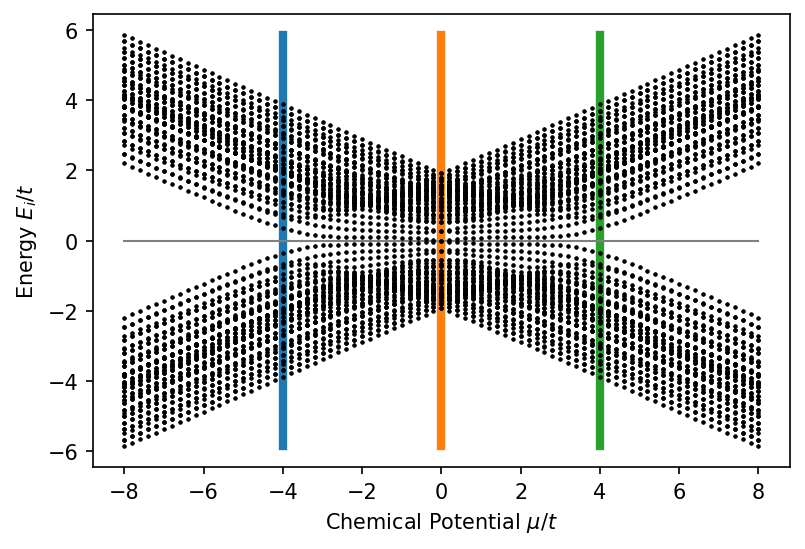

In [12]:
energies_mu = []
for mu in mu_values:
    Ham_constructor = HamiltonianConstructor(mu, t, t, delta)
    H_direct_lattice = Ham_constructor.construct_direct_lattice_hamiltonian(lattice)
    energies, states = scipy.linalg.eigh(H_direct_lattice)

    for energy in energies:
        energies_mu.append((mu, energy))

energy_vals = [elem[1] for elem in energies_mu]
plt.xlabel(r"Chemical Potential $\mu/t$")
plt.ylabel(r"Energy $E_{i}/t$")
plt.plot(
    mu_values,
    [0.0 for i in range(len(mu_values))],
    color="gray",
    linestyle="-",
    linewidth=1.0,
    zorder=10,
)
plt.plot(
    [-4 for i in range(num_vals)],
    np.linspace(min(energy_vals), max(energy_vals), num_vals),
    linestyle="-",
    linewidth=4.0,
    color="tab:blue",
)
plt.plot(
    [0 for i in range(num_vals)],
    np.linspace(min(energy_vals), max(energy_vals), num_vals),
    linestyle="-",
    linewidth=4.0,
    color="tab:orange",
)
plt.plot(
    [+4 for i in range(num_vals)],
    np.linspace(min(energy_vals), max(energy_vals), num_vals),
    linestyle="-",
    linewidth=4.0,
    color="tab:green",
)
plt.scatter(
    [elem[0] for elem in energies_mu],
    [elem[1] for elem in energies_mu],
    s=1.0,
    zorder=100,
    color="black",
)
plt.savefig("./plots/majorana_modes_square_lattice.png", dpi=400)